In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mehranehmgh","key":"c2c1365e6432393d8c5dfbe309c0236c"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 117MB/s]


In [5]:
!unzip '/content/new-york-city-airbnb-open-data.zip' -d '/content/'

Archive:  /content/new-york-city-airbnb-open-data.zip
  inflating: /content/AB_NYC_2019.csv  
  inflating: /content/New_York_City_.png  


In [6]:
import seaborn as sns
import pandas as pd
import scipy
from scipy.stats import f_oneway
from scipy import stats
import matplotlib.pyplot as plt
import pylab

In [127]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# **Data Cleaning**

In [128]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [130]:
df.shape

(48895, 16)

## delete outliers

In [131]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

In [132]:
df.shape

(44371, 16)

In [133]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [134]:
df.isnull().sum()[df.isnull().sum() > 0]

name                   15
host_name              17
last_review          9104
reviews_per_month    9104
dtype: int64

In [135]:
df.drop(['name','host_name','id'], axis=1, inplace=True)
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [136]:
for cols in df.columns:
    if df[cols].dtype == 'object':
        print('cols : {} , unique values : {}'.format(cols,df[cols].nunique()))

cols : neighbourhood_group , unique values : 5
cols : neighbourhood , unique values : 168
cols : room_type , unique values : 3
cols : last_review , unique values : 1757


In [137]:
for cols in df.columns:
  if df[cols].dtype == 'object' or df[cols].dtype == 'float64':
    df[cols].fillna(df[cols].value_counts().head(1).index[0],inplace = True)

In [138]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

#**Number of Reviews Stats**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

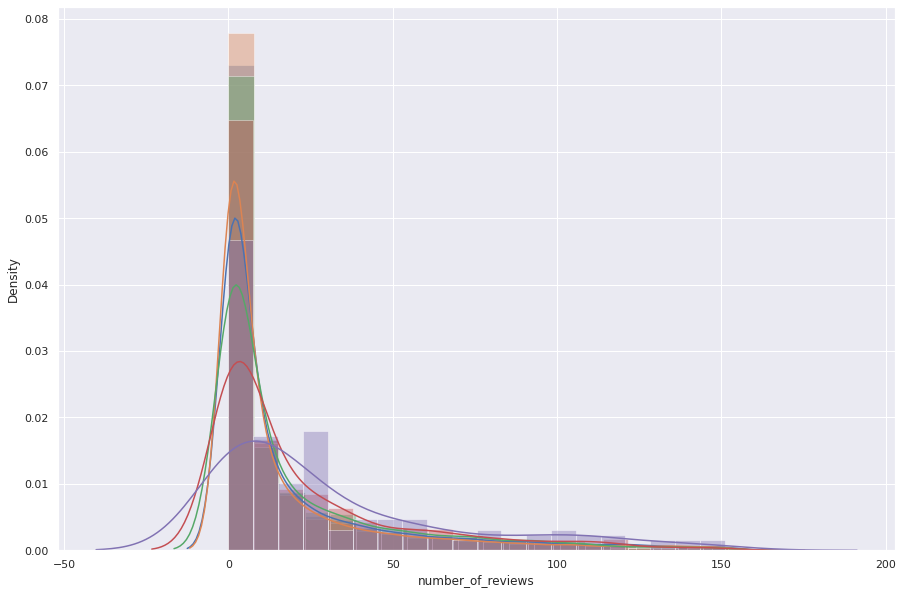

In [114]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in df.neighbourhood_group.unique():
    sns.distplot(df.number_of_reviews[df['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

In [20]:
df[["neighbourhood_group",'number_of_reviews']].groupby("neighbourhood_group").describe()

number_of_reviews                                        \
                                count       mean        std  min  25%   50%   
neighbourhood_group                                                           
Bronx                           963.0  21.743510  30.746189  0.0  1.0   8.0   
Brooklyn                      19165.0  18.720689  30.046985  0.0  1.0   5.0   
Manhattan                     19762.0  16.538913  28.432848  0.0  1.0   4.0   
Queens                         4311.0  19.193923  29.464950  0.0  1.0   5.0   
Staten Island                   170.0  30.782353  37.501317  0.0  2.0  17.5   

                                  
                      75%    max  
neighbourhood_group               
Bronx                30.0  152.0  
Brooklyn             22.0  155.0  
Manhattan            18.0  155.0  
Queens               25.0  155.0  
Staten Island        45.0  151.0

In [21]:
df[["neighbourhood_group",'neighbourhood']].groupby("neighbourhood_group").describe()

neighbourhood                           
                            count unique           top  freq
neighbourhood_group                                         
Bronx                         963     46   Kingsbridge    69
Brooklyn                    19165     47  Williamsburg  3735
Manhattan                   19762     32        Harlem  2532
Queens                       4311     31       Astoria   860
Staten Island                 170     12    St. George    44

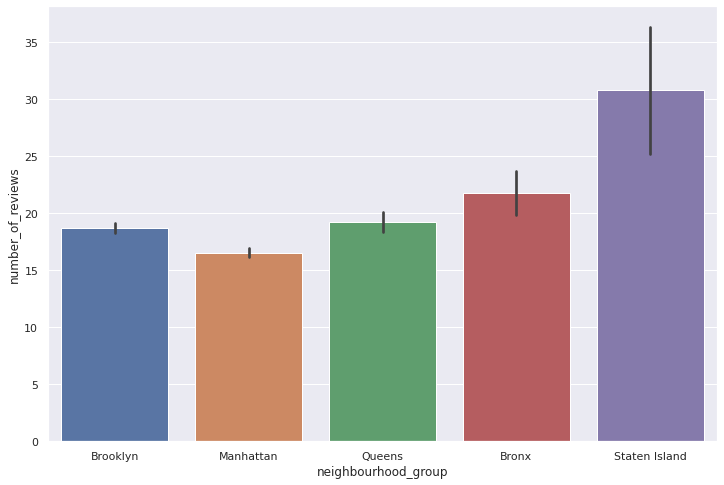

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x="neighbourhood_group", y="number_of_reviews", data=df)

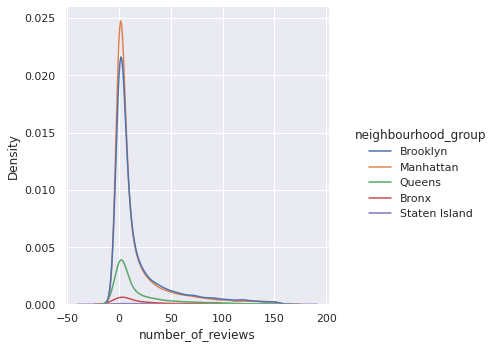

In [24]:
sns.displot(df, x="number_of_reviews",hue="neighbourhood_group",kind="kde")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


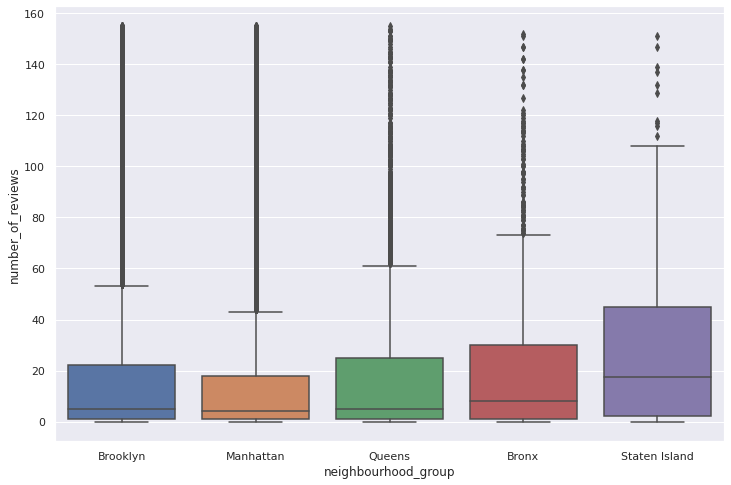

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot('neighbourhood_group' ,'number_of_reviews' , data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


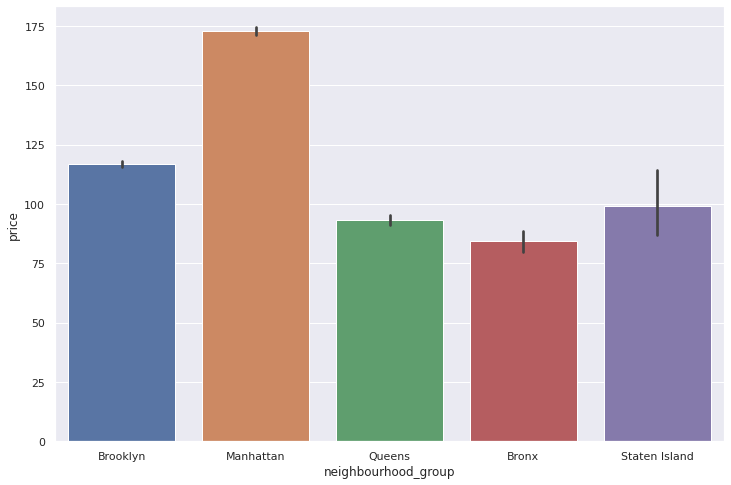

In [26]:
plt.figure(figsize=(12,8))

sns.barplot('neighbourhood_group' ,'price' , data = df)

# **Hosts**

In [27]:
df['host_id'].value_counts()

137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
            ... 
1572315        1
15445748       1
33950089       1
1491770        1
68119814       1
Name: host_id, Length: 35001, dtype: int64

In [28]:
temp = df['host_id'] == 137358866
most = df[temp]
most

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
32718,137358866,Manhattan,Harlem,40.81118,-73.94231,Private room,56,30,4,2019-04-06,0.37,103,244
32719,137358866,Manhattan,Harlem,40.81207,-73.94359,Private room,52,30,2,2019-01-31,0.18,103,184
32837,137358866,Manhattan,East Harlem,40.79322,-73.94038,Private room,34,30,3,2019-03-31,0.26,103,207
32846,137358866,Manhattan,Harlem,40.81205,-73.94309,Private room,32,30,0,2019-06-23,0.02,103,236
32872,137358866,Manhattan,Harlem,40.81098,-73.94278,Private room,52,30,1,2018-07-31,0.09,103,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44623,137358866,Manhattan,East Harlem,40.79395,-73.94153,Private room,38,30,0,2019-06-23,0.02,103,0
44718,137358866,Queens,Woodside,40.74341,-73.91064,Private room,54,30,0,2019-06-23,0.02,103,10
44773,137358866,Queens,Woodside,40.74300,-73.89444,Private room,47,30,0,2019-06-23,0.02,103,246
44776,137358866,Queens,Astoria,40.76571,-73.92758,Private room,48,30,0,2019-06-23,0.02,103,242


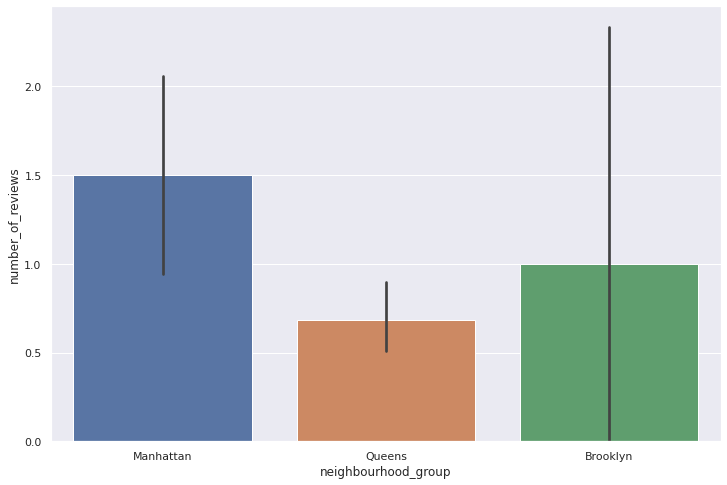

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x="neighbourhood_group", y="number_of_reviews", data=most)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


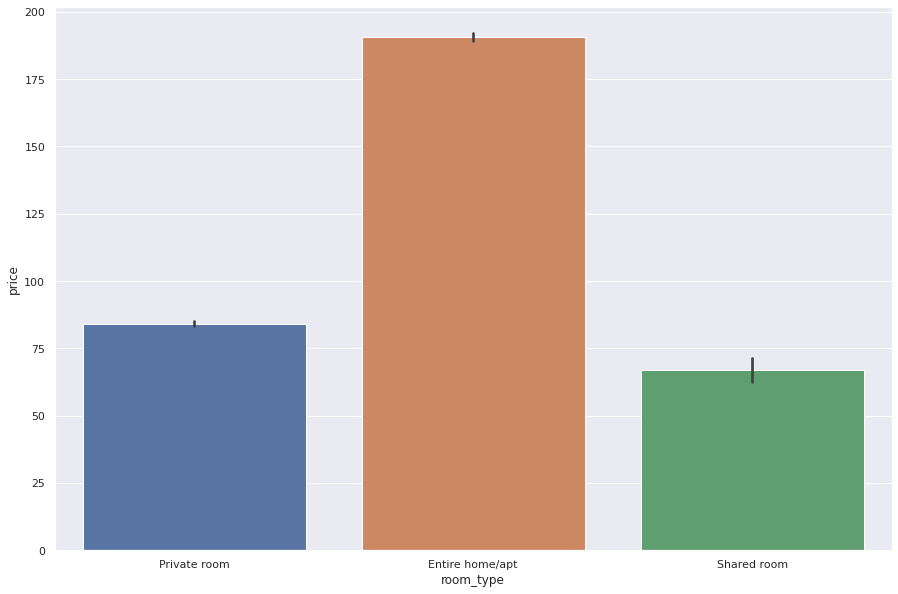

In [30]:
sns.barplot(df['room_type'] , df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


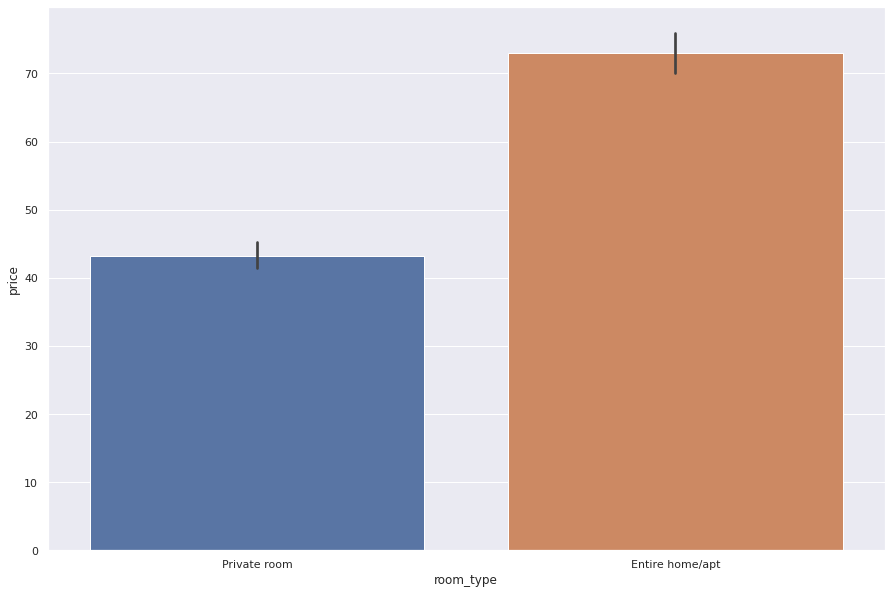

In [31]:
sns.barplot(most['room_type'] , most['price'])

#**Hypothesis Testing and Results**

## **ANOVA**

In [35]:
f_oneway(*[df.number_of_reviews[df.neighbourhood_group == i]
for i in df.neighbourhood_group.unique()])

F_onewayResult(statistic=28.820736899355722, pvalue=5.837015902359015e-24)

In [36]:
mask1 = df.neighbourhood_group == "Manhattan"
data1 = df[mask1]
manhattan = data1.sample(n=100)

mask2 = df.neighbourhood_group == "Brooklyn"
data2 = df[mask2]
brooklyn = data2.sample(n=100)

mask3 = df.neighbourhood_group == "Staten Island"
data3 = df[mask3]
staten = data3.sample(n=100)

mask4 = df.neighbourhood_group == "Queens"
data4 = df[mask4]
queens = data4.sample(n=100)

mask5 = df.neighbourhood_group == "Bronx"
data5 = df[mask5]
bronx = data5.sample(n=100)

new_samp = pd.concat([manhattan, brooklyn, staten, queens, bronx])

f_oneway(*[new_samp.number_of_reviews[new_samp.neighbourhood_group == s]
for s in new_samp.neighbourhood_group.unique()])

F_onewayResult(statistic=4.322263636996386, pvalue=0.0019087374987485717)

In [37]:
new_samp

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2970,8366233,Manhattan,East Harlem,40.79377,-73.93610,Private room,59,14,30,2019-06-04,0.43,2,36
31404,408485,Manhattan,East Village,40.72709,-73.99074,Entire home/apt,545,2,1,2019-06-23,1.00,1,177
15109,3555480,Manhattan,Chelsea,40.74507,-73.99452,Entire home/apt,175,7,6,2017-09-09,0.16,1,0
42032,64433748,Manhattan,Chelsea,40.74855,-74.00074,Shared room,65,1,19,2019-06-30,4.45,1,208
31484,16828799,Manhattan,Morningside Heights,40.80580,-73.96470,Entire home/apt,110,10,0,2019-06-23,0.02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442,8159536,Bronx,Concourse Village,40.83288,-73.91834,Private room,50,1,21,2019-06-02,0.36,3,188
10734,43583032,Bronx,West Farms,40.84328,-73.88173,Private room,79,1,3,2018-10-08,0.16,1,179
31676,98157128,Bronx,Wakefield,40.88764,-73.85580,Entire home/apt,100,2,38,2019-06-19,2.66,1,107
28368,148100571,Bronx,Soundview,40.82668,-73.88220,Entire home/apt,50,1,2,2017-12-09,0.10,2,0


In [38]:
new_samp[["neighbourhood_group",'number_of_reviews']].groupby("neighbourhood_group").describe()

number_of_reviews                                    \
                                count   mean        std  min  25%   50%   
neighbourhood_group                                                       
Bronx                           100.0  23.78  33.790974  0.0  2.0   9.0   
Brooklyn                        100.0  21.43  32.092749  0.0  1.0   4.0   
Manhattan                       100.0  15.92  26.046842  0.0  1.0   4.0   
Queens                          100.0  15.77  25.527507  0.0  1.0   5.0   
Staten Island                   100.0  31.67  38.511721  0.0  2.0  19.0   

                                   
                       75%    max  
neighbourhood_group                
Bronx                28.50  147.0  
Brooklyn             28.75  149.0  
Manhattan            15.50  129.0  
Queens               20.25  141.0  
Staten Island        46.75  151.0

## **T-Test**

In [39]:
mask = df.neighbourhood_group == "Staten Island"
val1 = df[mask]["number_of_reviews"].sample(n=100).values
len(val1)

100

In [40]:
val2 = df["number_of_reviews"].sample(n=100).values

In [41]:
stats.ttest_rel(val1,val2)

Ttest_relResult(statistic=2.4349594331258655, pvalue=0.01668315820620736)

In [42]:
stats.wilcoxon(val1,val2)

WilcoxonResult(statistic=1525.5, pvalue=0.011425791195185046)

In [43]:
df1 = df[mask]["number_of_reviews"].sample(n=100)
df2 = df["number_of_reviews"].sample(n=100)

In [44]:
mask1 = df.neighbourhood_group == "Brooklyn"
mask2= df.neighbourhood_group == "Staten Island"
val1 = df[mask1]["number_of_reviews"].sample(n=70).values
val2 = df[mask2]["number_of_reviews"].sample(n=70).values

In [45]:
stats.ttest_rel(val1,val2)

Ttest_relResult(statistic=-1.8173761146166711, pvalue=0.07350155167217784)

In [46]:
stats.wilcoxon(val1,val2)

WilcoxonResult(statistic=917.0, pvalue=0.11770390987146609)

# **Room Type** & **PRICE**

In [47]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [48]:
df[["room_type",'price']].groupby("room_type").describe()

price                                                    \
                   count        mean         std  min    25%    50%    75%   
room_type                                                                    
Entire home/apt  22853.0  190.844047  115.430517  0.0  120.0  160.0  225.0   
Private room     20430.0   84.121439   61.364480  0.0   50.0   70.0   96.0   
Shared room       1088.0   66.965074   72.995032  0.0   33.0   45.0   75.0   

                        
                   max  
room_type               
Entire home/apt  860.0  
Private room     848.0  
Shared room      800.0

## **ANOVA**

In [49]:
mask1 = df.room_type == "Entire home/apt"
data1 = df[mask1]
entire = data1.sample(n=100)

mask2 = df.room_type == "Private room"
data2 = df[mask2]
private = data2.sample(n=100)

mask3 = df.room_type == "Shared room"
data3 = df[mask3]
shared = data3.sample(n=100)

samp = pd.concat([entire, private, shared])

f_oneway(*[samp.price[samp.room_type == s]
for s in samp.room_type.unique()])

F_onewayResult(statistic=67.50131158457907, pvalue=6.832894467470626e-25)

## **T-Test**

In [50]:
mask = df.room_type == "Entire home/apt"
mask1 = df.room_type == "Private room"
df1 = df[mask]["price"].sample(n=100)
df2 = df[mask1]["price"].sample(n=100)

# **Minimum nights & Price**

In [48]:
df.minimum_nights.isnull().sum()

0

## **Correlation tests**

In [51]:
stats.spearmanr(df['minimum_nights'], df['price'])

SpearmanrResult(correlation=0.07566224709499751, pvalue=2.4176573684113954e-57)

In [52]:
cor, pval = stats.pearsonr(df['minimum_nights'], df['price'])
print(cor, pval)

0.008967212311134868 0.05890838313097556


In [53]:
sample_1 = df.sample(n=200)

In [54]:
stats.spearmanr(sample_1['minimum_nights'], sample_1['price'])

SpearmanrResult(correlation=0.12695399712990063, pvalue=0.07322874428011589)

In [55]:
cor, pval = stats.pearsonr(sample_1['minimum_nights'], sample_1['price'])
print(cor, pval)

-0.04290205408526004 0.5463746536548117


# **Availibility & Busy**

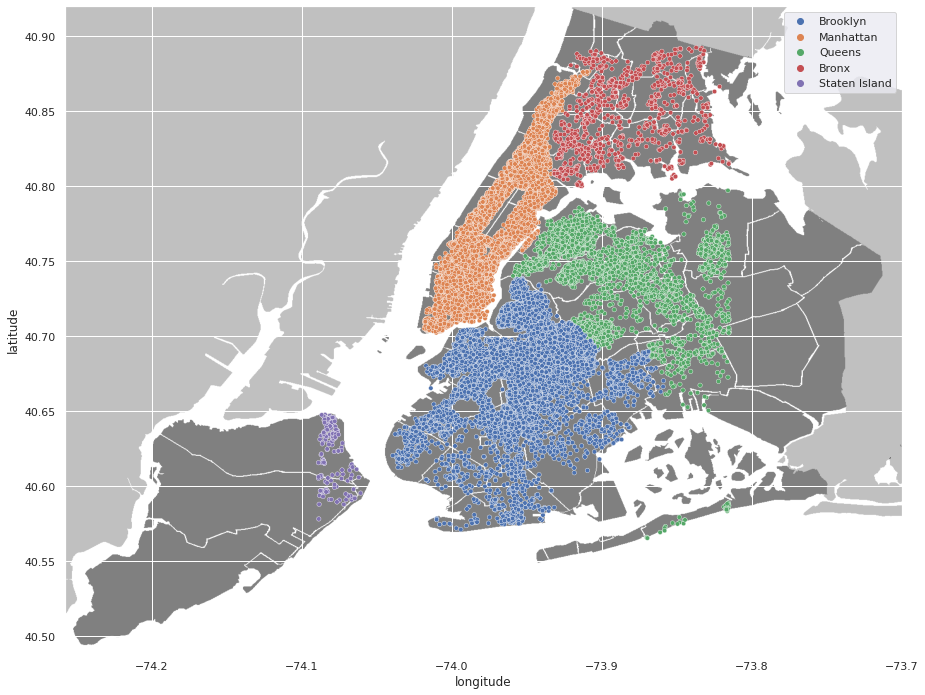

In [56]:
import matplotlib.pyplot as plt
import urllib
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue='neighbourhood_group',s=20, data=df)
plt.legend()
plt.show()

In [70]:
df['busy_or_not']= 0
df

##if busy(availibility=0)=1 if not = 0

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,busy_or_not
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.02,1,365,0
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,0.02,2,9,0
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,0.02,2,36,0
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,0.02,1,27,0
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,0.02,6,2,0


In [71]:
for i in range(len(df)):
    if int(df.iloc[i, df.columns.get_loc('availability_365')]) == 0:
        df.iloc[i, df.columns.get_loc('busy_or_not')] = 1

In [72]:
df[["neighbourhood_group",'busy_or_not']].groupby("neighbourhood_group").describe()

busy_or_not                                             
                          count      mean       std  min  25%  50%  75%  max
neighbourhood_group                                                         
Bronx                     963.0  0.169263  0.375179  0.0  0.0  0.0  0.0  1.0
Brooklyn                19165.0  0.404696  0.490846  0.0  0.0  0.0  1.0  1.0
Manhattan               19762.0  0.403299  0.490572  0.0  0.0  0.0  1.0  1.0
Queens                   4311.0  0.287636  0.452713  0.0  0.0  0.0  1.0  1.0
Staten Island             170.0  0.088235  0.284475  0.0  0.0  0.0  0.0  1.0

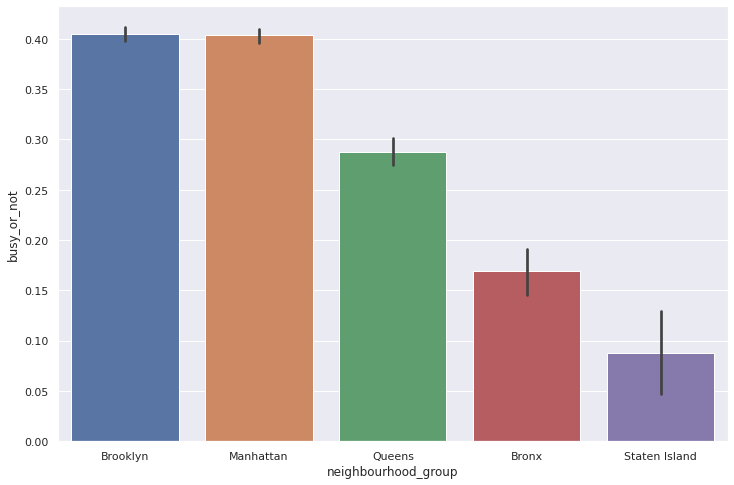

In [73]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="neighbourhood_group", y="busy_or_not", data=df)

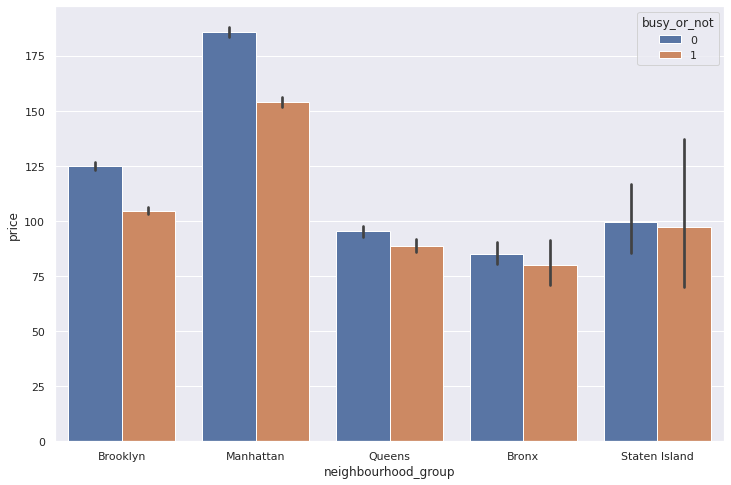

In [74]:
plt.figure(figsize=(12,8))
sns.barplot(x="neighbourhood_group", y="price", hue="busy_or_not", data=df)

In [75]:
mask1 = df.busy_or_not == 1

In [76]:
df1 = df[mask]["price"].sample(n=50)
df2 = df["price"].sample(n=50)

In [77]:
v1 = df[mask]["number_of_reviews"].sample(n=50).values
v2 = df["number_of_reviews"].sample(n=50).values

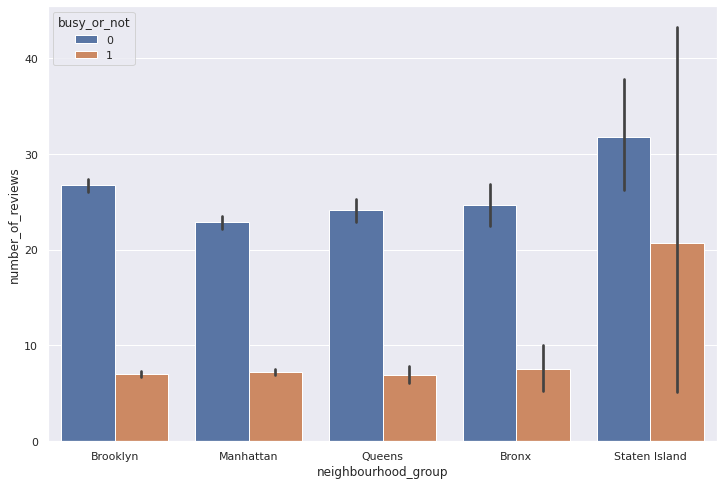

In [78]:
plt.figure(figsize=(12,8))
sns.barplot(x="neighbourhood_group", y="number_of_reviews", hue="busy_or_not", data=df)

In [79]:
stats.ttest_rel(val1,val2)

Ttest_relResult(statistic=-1.8173761146166711, pvalue=0.07350155167217784)

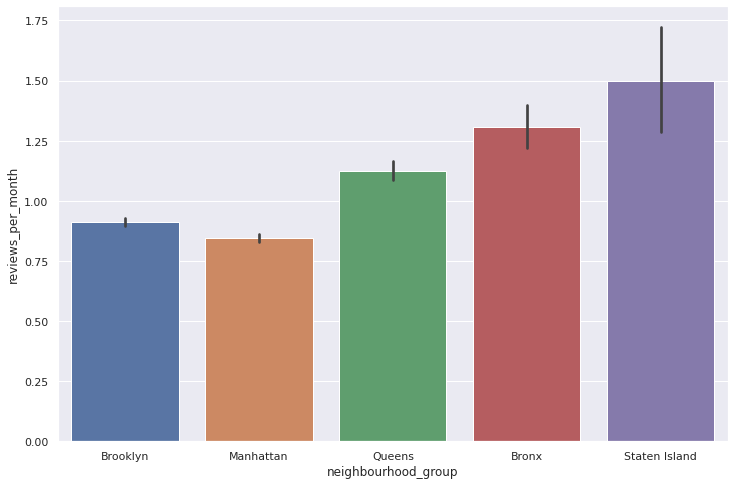

In [80]:
plt.figure(figsize=(12,8))
sns.barplot(x="neighbourhood_group", y="reviews_per_month",data=df)

In [81]:
df[["neighbourhood_group",'availability_365']].groupby("neighbourhood_group").describe()

availability_365                                     \
                               count        mean         std  min   25%   
neighbourhood_group                                                       
Bronx                          963.0  162.925234  135.919402  0.0  35.0   
Brooklyn                     19165.0   96.958570  125.539707  0.0   0.0   
Manhattan                    19762.0  102.178879  129.305929  0.0   0.0   
Queens                        4311.0  131.164695  134.525726  0.0   0.0   
Staten Island                  170.0  205.505882  127.656448  0.0  87.0   

                                           
                       50%     75%    max  
neighbourhood_group                        
Bronx                138.0  313.00  365.0  
Brooklyn              22.0  179.00  365.0  
Manhattan             23.0  199.00  365.0  
Queens                84.0  264.50  365.0  
Staten Island        224.5  325.25  365.0

In [82]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'East Harlem', 'Murray Hill',
       'Bedford-Stuyvesant', 'Upper West Side', 'Williamsburg',
       'Crown Heights', 'Park Slope', 'Windsor Terrace', 'Inwood',
       "Hell's Kitchen", 'East Village', 'Flatbush', 'South Slope',
       'Fort Greene', 'Prospect-Lefferts Gardens', 'Kips Bay',
       'Lower East Side', 'Greenpoint', 'SoHo', 'Upper East Side',
       'Prospect Heights', 'Clinton Hill', 'Washington Heights',
       'Woodside', 'Brooklyn Heights', 'Bushwick', 'Chelsea',
       'West Village', 'Gowanus', 'Flatlands', 'Cobble Hill', 'Flushing',
       'Boerum Hill', 'Sunnyside', 'DUMBO', 'Carroll Gardens',
       'Financial District', 'Ridgewood', 'Morningside Heights',
       'Middle Village', 'Highbridge', 'NoHo', 'Ditmars Steinway',
       'Flatiron District', 'Roosevelt Island', 'Chinatown',
       'Greenwich Village', 'Little Italy', 'Tompkinsville',
       'Clason Point', 'Eastchester', 'Kingsbridge', 'Astoria',
       'Forest Hi

In [83]:
man = df.neighbourhood_group == "Manhattan"
brook = df.neighbourhood_group == "Brooklyn"
staten = df.neighbourhood_group == "Staten Island"
queens = df.neighbourhood_group == "Queens"
bronx = df.neighbourhood_group == "Bronx"

In [84]:
df[man][["neighbourhood",'availability_365']].groupby("neighbourhood").describe()

availability_365                                           \
                               count        mean         std  min  25%    50%   
neighbourhood                                                                   
Battery Park City               59.0   73.474576  129.213050  0.0  0.0    0.0   
Chelsea                        979.0   99.031665  129.838983  0.0  0.0   17.0   
Chinatown                      351.0   86.487179  116.266488  0.0  0.0   15.0   
Civic Center                    49.0   68.755102  112.287676  0.0  0.0    7.0   
East Harlem                   1045.0   96.955024  120.389004  0.0  0.0   32.0   
East Village                  1736.0   67.696429  109.900587  0.0  0.0    0.0   
Financial District             471.0  129.639066  142.453521  0.0  0.0   60.0   
Flatiron District               71.0  109.126761  142.076029  0.0  0.0    9.0   
Gramercy                       316.0   87.069620  124.643778  0.0  0.0   10.0   
Greenwich Village              364.0   72.565934  111.154515  0.0  0.0    1.5   
Harlem                        2532.0  102.690758  124.895881  0.0  0.0   37.0   
Hell's Kitchen                1738.0  128.493671  135.666262  0.0  0.0   74.0   
Inwood                         245.0   97.836735  125.787478  0.0  0.0   19.0   
Kips Bay                       433.0  115.006928  139.269830  0.0  0.0   20.0   
Little Italy                   112.0   97.964286  120.806369  0.0  0.0   35.0   
Lower East Side                856.0   93.137850  123.908360  0.0  0.0   11.5   
Marble Hill                     12.0  114.666667  144.996761  0.0  0.0   26.0   
Midtown                       1396.0  150.624642  142.463928  0.0  0.0  139.0   
Morningside Heights            337.0   40.071217   89.005690  0.0  0.0    0.0   
Murray Hill                    414.0  164.347826  150.971318  0.0  0.0  140.0   
NoHo                            76.0   98.592105  120.930082  0.0  0.0   37.0   
Nolita                         239.0   63.251046  100.061555  0.0  0.0    0.0   
Roosevelt Island                73.0   70.068493  117.243376  0.0  0.0    0.0   
SoHo                           332.0  102.421687  125.611916  0.0  0.0   36.5   
Stuyvesant Town                 35.0   62.285714  105.969633  0.0  0.0    0.0   
Theater District               198.0  174.949495  145.958333  0.0  3.0  188.5   
Tribeca                        127.0   90.448819  123.302680  0.0  0.0   20.0   
Two Bridges                     62.0   91.500000  116.093059  0.0  0.0   42.0   
Upper East Side               1700.0  107.722941  133.942404  0.0  0.0   22.5   
Upper West Side               1834.0   90.670120  126.096949  0.0  0.0    4.0   
Washington Heights             864.0   95.193287  122.716353  0.0  0.0   26.0   
West Village                   706.0   76.917847  116.571247  0.0  0.0    3.0   

                                    
                        75%    max  
neighbourhood                       
Battery Park City     57.00  363.0  
Chelsea              194.50  365.0  
Chinatown            165.50  365.0  
Civic Center          89.00  365.0  
East Harlem          179.00  365.0  
East Village          91.00  365.0  
Financial District   298.50  365.0  
Flatiron District    197.50  365.0  
Gramercy             171.50  365.0  
Greenwich Village    130.00  365.0  
Harlem               192.25  365.0  
Hell's Kitchen       252.75  365.0  
Inwood               180.00  365.0  
Kips Bay             261.00  365.0  
Little Italy         172.25  362.0  
Lower East Side      185.00  365.0  
Marble Hill          255.50  349.0  
Midtown              301.00  365.0  
Morningside Heights   18.00  365.0  
Murray Hill          334.50  365.0  
NoHo                 179.00  364.0  
Nolita                89.50  365.0  
Roosevelt Island      73.00  362.0  
SoHo                 179.25  365.0  
Stuyvesant Town       86.50  365.0  
Theater District     317.00  365.0  
Tribeca              136.00  365.0  
Two Bridges          151.75  359.0  
Upper East Side      229.25  365.0  


In [85]:
df[brook][["neighbourhood",'availability_365']].groupby("neighbourhood").describe()

availability_365                                 \
                                     count        mean         std    min   
neighbourhood                                                               
Bath Beach                            17.0  196.117647  152.618758    0.0   
Bay Ridge                            133.0  137.421053  130.727000    0.0   
Bedford-Stuyvesant                  3510.0  114.314530  129.968884    0.0   
Bensonhurst                           72.0  131.694444  124.813059    0.0   
Bergen Beach                          10.0  138.200000  103.108142    4.0   
Boerum Hill                          165.0   70.666667  110.728537    0.0   
Borough Park                         134.0  170.388060  142.253185    0.0   
Brighton Beach                        71.0  177.281690  135.753472    0.0   
Brooklyn Heights                     146.0   58.849315   96.483791    0.0   
Brownsville                           59.0  122.542373  128.384702    0.0   
Bushwick                            2360.0   93.062712  126.273643    0.0   
Canarsie                             130.0  227.607692  130.757512    0.0   
Carroll Gardens                      229.0   67.899563  102.216246    0.0   
Clinton Hill                         543.0   89.005525  127.091775    0.0   
Cobble Hill                           91.0   52.615385   85.697630    0.0   
Columbia St                           40.0   66.550000  105.742539    0.0   
Coney Island                          17.0  163.235294  121.977728    0.0   
Crown Heights                       1509.0   92.366468  122.733755    0.0   
Cypress Hills                        124.0  171.459677  134.063230    0.0   
DUMBO                                 32.0   98.343750  133.730979    0.0   
Downtown Brooklyn                     82.0   39.963415   84.792913    0.0   
Dyker Heights                         12.0  144.750000  121.550682    0.0   
East Flatbush                        472.0  183.027542  137.640017    0.0   
East New York                        205.0  187.902439  121.012883    0.0   
Flatbush                             603.0   90.067993  120.981590    0.0   
Flatlands                             80.0  196.000000  136.881359    0.0   
Fort Greene                          473.0   86.695560  118.401663    0.0   
Fort Hamilton                         55.0  151.000000  139.114528    0.0   
Gowanus                              230.0  119.252174  143.731879    0.0   
Gravesend                             67.0  131.044776  137.831521    0.0   
Greenpoint                          1086.0   77.997238  118.109521    0.0   
Kensington                           172.0   80.284884  115.352271    0.0   
Manhattan Beach                        8.0  205.625000  142.614303    0.0   
Midwood                              105.0   95.257143  121.682123    0.0   
Mill Basin                             4.0  290.000000  101.859380  139.0   
Navy Yard                             14.0   48.928571  101.703539    0.0   
Park Slope                           476.0   82.428571  116.504335    0.0   
Prospect Heights                     328.0   68.246951  106.982879    0.0   
Prospect-Lefferts Gardens            509.0   90.762279  120.821436    0.0   
Red Hook                              75.0   87.226667  113.934378    0.0   
Sea Gate                               5.0   39.800000   78.804822    0.0   
Sheepshead Bay                       153.0  162.071895  141.781156    0.0   
South Slope                          263.0   77.988593  111.827958    0.0   
Sunset Park                          379.0  103.546174  127.503480    0.0   
Vinegar Hill                          32.0   66.812500  104.273040    0.0   
Williamsburg                        3735.0   70.634806  111.088597    0.0   
Windsor Terrace                      150.0   79.800000  106.210062    0.0   

                                                         
                              25%    50%     75%    max  
neighbourhood                                            
B

In [86]:
df[staten][["neighbourhood",'availability_365']].groupby("neighbourhood").describe()

availability_365                                               \
                          count        mean         std    min    25%    50%   
neighbourhood                                                                  
Arrochar                   21.0  255.809524  112.073020   12.0  189.0  306.0   
Clifton                    13.0  175.769231  148.058071    0.0   37.0  155.0   
Concord                    23.0  242.739130  123.849328    2.0   88.0  316.0   
Dongan Hills                1.0  134.000000         NaN  134.0  134.0  134.0   
Fort Wadsworth              1.0  365.000000         NaN  365.0  365.0  365.0   
Grymes Hill                 1.0  174.000000         NaN  174.0  174.0  174.0   
Rosebank                    5.0  156.800000  103.260351    0.0  114.0  179.0   
Shore Acres                 7.0  114.571429  112.213869    0.0   43.5   89.0   
South Beach                 5.0  202.800000  108.465202   80.0  127.0  176.0   
St. George                 44.0  180.045455  132.216692    0.0   53.5  184.5   
Stapleton                  26.0  215.076923  136.691162    0.0   80.5  255.5   
Tompkinsville              23.0  213.434783  114.430934    0.0  162.5  237.0   

                              
                  75%    max  
neighbourhood                 
Arrochar        338.0  362.0  
Clifton         312.0  361.0  
Concord         333.5  360.0  
Dongan Hills    134.0  134.0  
Fort Wadsworth  365.0  365.0  
Grymes Hill     174.0  174.0  
Rosebank        244.0  247.0  
Shore Acres     174.0  278.0  
South Beach     308.0  323.0  
St. George      328.5  365.0  
Stapleton       352.5  365.0  
Tompkinsville   300.5  352.0

In [87]:
df[queens][["neighbourhood",'availability_365']].groupby("neighbourhood").describe()

availability_365                                         \
                             count        mean         std    min     25%   
neighbourhood                                                               
Astoria                      860.0  105.344186  129.837393    0.0    0.00   
Belle Harbor                   8.0  186.625000  160.645072   22.0   39.00   
Breezy Point                   3.0  100.333333   52.937070   59.0   70.50   
Briarwood                     25.0  188.640000  125.721213    0.0   90.00   
College Point                 17.0  149.176471  147.972225    0.0    3.00   
Corona                        59.0  248.762712  129.015682    0.0  125.00   
Ditmars Steinway             296.0  114.418919  134.510488    0.0    0.00   
East Elmhurst                118.0  152.186441  130.455740    0.0   36.25   
Elmhurst                     232.0  126.051724  124.419577    0.0    0.75   
Flushing                     263.0  156.425856  133.278797    0.0   57.00   
Forest Hills                 142.0  124.887324  129.697198    0.0    0.00   
Glendale                      53.0  145.188679  130.191879    0.0    3.00   
Howard Beach                  18.0  207.277778  153.804615    0.0   34.50   
Jackson Heights              179.0  152.960894  133.590829    0.0   22.00   
Jamaica                        5.0  358.600000    7.231874  348.0  355.00   
Kew Gardens                   30.0  201.333333  157.374215    0.0   20.75   
Kew Gardens Hills             18.0  120.555556  126.630645    0.0    0.25   
Long Island City             513.0  114.912281  135.347809    0.0    0.00   
Maspeth                      107.0  187.915888  118.338428    0.0   80.50   
Middle Village                28.0  216.214286  115.562507    0.0  117.00   
Neponsit                       3.0  231.000000  162.225152   44.0  179.50   
Ozone Park                    56.0  155.464286  131.078597    0.0   51.75   
Rego Park                    103.0  130.019417  132.422673    0.0    5.00   
Richmond Hill                 83.0  199.228916  133.347366    0.0   70.00   
Ridgewood                    407.0  111.366093  128.912699    0.0    0.00   
Rockaway Beach                18.0  170.111111  118.103090    0.0   85.00   
South Ozone Park               5.0  215.200000  126.557102   42.0  175.00   
Sunnyside                    352.0  124.937500  135.383939    0.0    0.00   
Whitestone                     9.0  135.555556  111.512456    0.0   86.00   
Woodhaven                     80.0  195.950000  135.372706    0.0   52.75   
Woodside                     221.0  124.900452  128.259924    0.0    0.00   

                                         
                     50%     75%    max  
neighbourhood                            
Astoria             31.0  206.25  365.0  
Belle Harbor       188.0  326.75  364.0  
Breezy Point        82.0  121.00  160.0  
Briarwood          189.0  301.00  365.0  
College Point       79.0  310.00  361.0  
Corona             330.0  355.00  365.0  
Ditmars Steinway    37.0  232.50  365.0  
East Elmhurst      106.0  295.50  365.0  
Elmhurst            89.0  239.75  365.0  
Flushing            90.0  319.00  365.0  
Forest Hills        85.5  229.50  365.0  
Glendale           117.0  274.00  365.0  
Howard Beach       286.5  341.75  365.0  
Jackson Heights    132.0  300.50  365.0  
Jamaica            360.0  365.00  365.0  
Kew Gardens        290.5  338.50  365.0  
Kew Gardens Hills   89.5  178.00  364.0  
Long Island City    42.0  247.00  365.0  
Maspeth            188.0  303.50  365.0  
Middle Village     233.5  314.00  365.0  
Neponsit           315.0  324.50  334.0  
Ozone Park         129.5  298.75  364.0  
Rego Park           89.0  270.00  365.0  
Richmond Hill      179.0  343.00  365.0  
Ridgewood           59.0  194.50  365.0  
Rockaway Beach     133.5  258.75  363.0  
South Ozone Park   180.0  327.00  352.0  
Sunnyside           74.5  250.25  365.0  
Whitestone          89.0  204.00  311.0  
Woodhaven          213.5  332.75  365.0  
Woodside     

In [88]:
df[bronx][["neighbourhood",'availability_365']].groupby("neighbourhood").describe()

availability_365                                         \
                              count        mean         std    min     25%   
neighbourhood                                                                
Allerton                       37.0  153.189189  118.535001    0.0   57.00   
Baychester                      6.0  160.166667  143.146661    0.0   64.25   
Belmont                        23.0  192.173913  160.763421    0.0    0.00   
Bronxdale                      19.0  145.421053  132.044317    0.0    0.00   
Castle Hill                     9.0  159.333333   44.181444   42.0  169.00   
Claremont Village              23.0  188.043478  127.590780    3.0   99.50   
Clason Point                   20.0  235.200000  130.763587    0.0  127.75   
Co-op City                      2.0  364.000000    1.414214  363.0  363.50   
Concourse                      49.0  157.775510  128.891632    0.0   20.00   
Concourse Village              31.0  155.774194  129.318911    0.0   23.00   
East Morrisania                10.0  193.500000  119.668292   80.0   83.00   
Eastchester                    13.0  333.461538   75.538749   88.0  348.00   
Edenwald                       13.0  213.461538  128.914452   32.0   89.00   
Fieldston                       6.0   64.000000  124.478111    0.0    0.00   
Fordham                        61.0  137.622951  124.521372    0.0   39.00   
Highbridge                     26.0  151.076923  141.775011    0.0   17.00   
Hunts Point                    18.0  239.166667  140.638146    0.0  103.00   
Kingsbridge                    69.0  159.536232  141.202981    0.0   47.00   
Longwood                       58.0  151.689655  144.268780    0.0    0.00   
Melrose                        10.0   93.600000   89.103186    0.0    9.25   
Morris Heights                 15.0  186.666667  162.850355    0.0    5.50   
Morris Park                    14.0  129.857143  137.428503    0.0   23.75   
Morrisania                     18.0  135.500000  126.979039    0.0   29.25   
Mott Haven                     54.0  148.611111  127.204102    0.0   41.25   
Mount Eden                      5.0  121.800000  168.455335    0.0    0.00   
Mount Hope                     17.0  150.705882  151.902010    0.0    6.00   
Norwood                        30.0  159.433333  136.860030    0.0    1.50   
Olinville                       3.0  166.666667  157.090208    0.0   94.00   
Parkchester                    38.0  140.605263  137.026835    0.0   12.00   
Pelham Bay                     17.0  201.647059  141.926452    0.0   78.00   
Pelham Gardens                 27.0  139.296296  128.535483    0.0   20.00   
Port Morris                    45.0  147.755556  135.680466    0.0   45.00   
Riverdale                       8.0  156.250000  141.760109    0.0   39.00   
Schuylerville                  10.0  104.300000  108.060734    0.0   12.25   
Soundview                      15.0  133.666667  114.031115    0.0   49.50   
Spuyten Duyvil                  3.0  238.333333  144.970112   71.0  194.50   
Throgs Neck                    20.0  154.100000  145.220305    0.0   36.00   
Tremont                        11.0  119.000000  122.689853    0.0    0.00   
Unionport                       7.0  244.000000   87.193272  145.0  170.50   
University Heights             21.0  135.285714  145.733367    0.0    0.00   
Van Nest                       11.0  156.363636  142.653617    8.0   28.50   
Wakefield                      20.0  174.800000  143.838213    0.0   41.75   
West Farms                      2.0  244.500000   92.630988  179.0  211.75   
Westchester Square             10.0  159.700000  118.680758    0.0  124.50   
Williamsbridge                 38.0  223.052632  144.188493    0.0   73.75   
Woodlawn                        1.0   87.000000         NaN   87.0   87.00   

                                          
                      50%     75%    max  
neighbourhood                             
Allerton            155.0  240.00  364.0  
Baychester          124.

# **Make price distribution Normal**

In [89]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [90]:
df = df[df['price']>0]

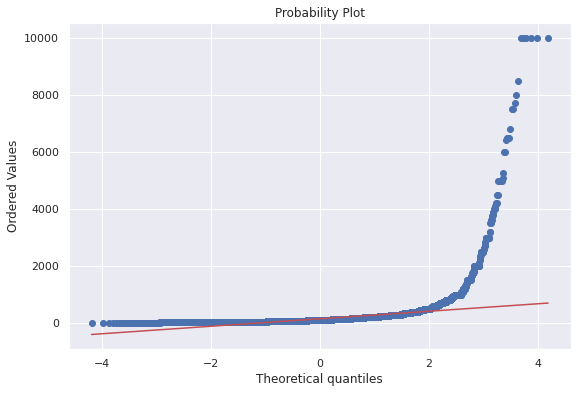

In [91]:
plt.figure(figsize=(9, 6))
stats.probplot(df.price,plot=pylab);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


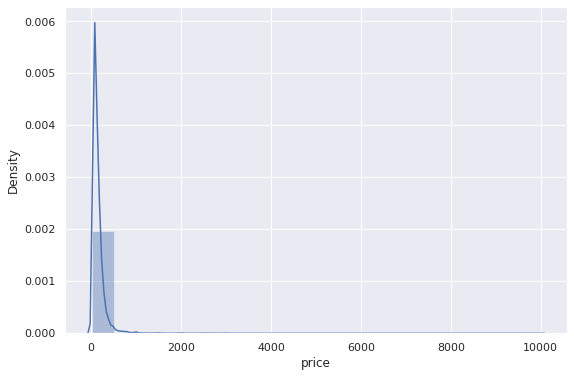

In [92]:
plt.figure(figsize=(9, 6))
sns.distplot(df['price'],kde_kws={"label": 'price'}, bins=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


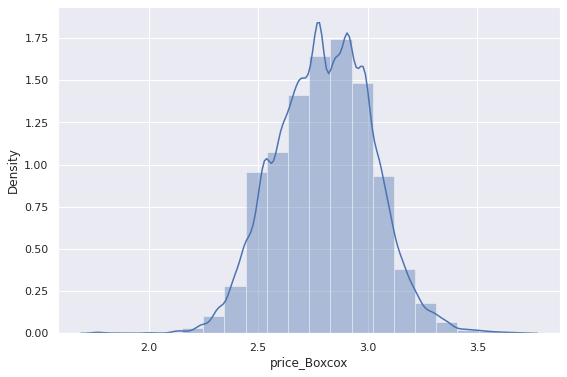

In [93]:
plt.figure(figsize=(9, 6))
df['price_Boxcox'],parameters=stats.boxcox(df['price'])
sns.distplot(df['price_Boxcox'],kde_kws={"label": 'price_Boxcox'}, bins=20)

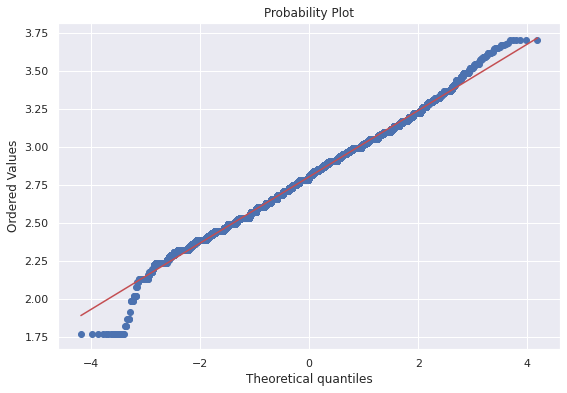

In [94]:
plt.figure(figsize=(9, 6))
stats.probplot(df.price_Boxcox,plot=pylab);

In [95]:
print(df.price_Boxcox.mean())
print(df.price_Boxcox.median())
print(df.price_Boxcox.mode()[0])

2.802758525845997
2.800588630131101
2.781519932051961


In [96]:
df[["neighbourhood_group",'price_Boxcox']].groupby("neighbourhood_group").describe()

price_Boxcox                                          \
                           count      mean       std       min       25%   
neighbourhood_group                                                        
Bronx                     1090.0  2.642381  0.204792  1.767087  2.491336   
Brooklyn                 20095.0  2.752636  0.207397  1.767087  2.602371   
Manhattan                21660.0  2.889433  0.198011  1.767087  2.764511   
Queens                    5666.0  2.687861  0.199247  1.767087  2.532898   
Staten Island              373.0  2.683908  0.223798  1.913039  2.532898   

                                                   
                          50%       75%       max  
neighbourhood_group                                
Bronx                2.631920  2.778204  3.519419  
Brooklyn             2.746353  2.908822  3.698189  
Manhattan            2.908822  3.018163  3.698189  
Queens               2.683348  2.812572  3.698189  
Staten Island        2.683348  2.812572  3.616254

In [97]:
f_oneway(*[df.price_Boxcox[df.neighbourhood_group == s]
for s in df.neighbourhood_group.unique()])

F_onewayResult(statistic=1960.4664005110608, pvalue=0.0)

In [98]:
mask = df.neighbourhood_group == "Staten Island"
val1 = df[mask]["price_Boxcox"].sample(n=100).values
len(val1)

100

In [99]:
val2 = df["price_Boxcox"].sample(n=100).values

In [100]:
stats.ttest_rel(val1,val2)

Ttest_relResult(statistic=-1.910836867044705, pvalue=0.0589185749230364)

In [101]:
mask1 = df.neighbourhood_group == "Manhattan"
data1 = df[mask1]
manhattan = data1.sample(n=50)

mask2 = df.neighbourhood_group == "Brooklyn"
data2 = df[mask2]
brooklyn = data2.sample(n=50)

mask3 = df.neighbourhood_group == "Staten Island"
data3 = df[mask3]
staten = data3.sample(n=50)

mask4 = df.neighbourhood_group == "Queens"
data4 = df[mask4]
queens = data4.sample(n=50)

mask5 = df.neighbourhood_group == "Bronx"
data5 = df[mask5]
bronx = data5.sample(n=50)

new_samp = pd.concat([manhattan, brooklyn, staten, queens, bronx])

f_oneway(*[new_samp.price_Boxcox[new_samp.neighbourhood_group == s]
for s in new_samp.neighbourhood_group.unique()])

F_onewayResult(statistic=10.778582403079493, pvalue=4.59632587783106e-08)

# Model

In [139]:
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.02,1,365
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,0.02,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,0.02,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,0.02,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,0.02,6,2


In [140]:
df = df.drop(columns=['last_review' , 'longitude','latitude','neighbourhood', 'host_id'])

In [141]:
df.head(10)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Private room,150,3,0,0.02,1,365
4,Manhattan,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Entire home/apt,200,3,74,0.59,1,129
6,Brooklyn,Private room,60,45,49,0.40,1,0
8,Manhattan,Private room,79,2,118,0.99,1,0
10,Manhattan,Entire home/apt,135,5,53,0.43,1,6
13,Manhattan,Private room,85,2,113,0.91,1,333
15,Brooklyn,Entire home/apt,140,2,148,1.20,1,46


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44371 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             44371 non-null  object 
 1   room_type                       44371 non-null  object 
 2   price                           44371 non-null  int64  
 3   minimum_nights                  44371 non-null  int64  
 4   number_of_reviews               44371 non-null  int64  
 5   reviews_per_month               44371 non-null  float64
 6   calculated_host_listings_count  44371 non-null  int64  
 7   availability_365                44371 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 4.1+ MB


In [144]:
categorical_features = []
for cols in df.columns:
    if df[cols].dtype == 'object' :
        categorical_features.append(cols)
        
categorical_features

['neighbourhood_group', 'room_type']

In [145]:
temp = pd.get_dummies(df[categorical_features])
df = pd.concat([df, temp], axis=1)
df = df.drop(columns = categorical_features)
df

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
2,150,3,0,0.02,1,365,0,0,1,0,0,0,1,0
4,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0
5,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,70,2,0,0.02,2,9,0,1,0,0,0,0,1,0
48891,40,4,0,0.02,2,36,0,1,0,0,0,0,1,0
48892,115,10,0,0.02,1,27,0,0,1,0,0,1,0,0
48893,55,1,0,0.02,6,2,0,0,1,0,0,0,0,1


In [146]:
df.columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [147]:
y = df['price'].values
x = df.drop(columns = ['price']).values

print(x.shape)
print(y.shape)

(44371, 13)
(44371,)


In [148]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [149]:
print(x_train.shape)
print(y_train.shape)


print(x_test.shape)
print(y_test.shape)

(35496, 13)
(35496,)
(8875, 13)
(8875,)


In [155]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **Regression**

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Linear = LinearRegression()

In [161]:
Linear.fit(x_train,y_train)

LinearRegression()

In [162]:
y_pred = Linear.predict(x_test)

In [163]:
#MSE for test

mean_squared_error(y_pred,y_test)

7922.191580507241

In [164]:
pred = pd.DataFrame({'test':y_test,'pred':y_pred})
pred.head()

,test,pred
0,300,181.764622
1,255,235.586644
2,179,175.780003
3,70,50.327367
4,115,130.203099


## Ridge Regression

In [167]:
y = df['price'].values
x = df.drop(columns = ['price']).values

print(x.shape)
print(y.shape)

(44371, 13)
(44371,)


In [168]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [170]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train, y_train)
ridge_pred = ridge_reg.predict(x_test)

In [171]:
mean_squared_error(ridge_pred,y_test)

7922.174164833073